# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


df = pd.read_csv("../data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df.shape

(614, 13)

In [3]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [6]:
df['Credit_History'].value_counts()[1]

475

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64
count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


Text(0, 0.5, 'Count')

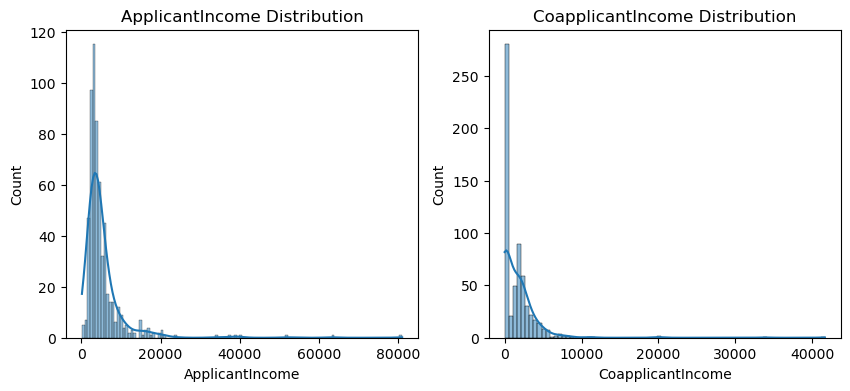

In [7]:

# Summary statistics of ApplicantIncome and CoapplicantIncome

print(df['ApplicantIncome'].describe())
print(df['CoapplicantIncome'].describe())

# Histograms of ApplicantIncome and CoapplicantIncome 
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['ApplicantIncome'], kde=True, ax=axes[0])
axes[0].set_title('ApplicantIncome Distribution')
axes[0].set_xlabel('ApplicantIncome')
axes[0].set_ylabel('Count')
sns.histplot(df['CoapplicantIncome'], kde=True, ax=axes[1])
axes[1].set_title('CoapplicantIncome Distribution')
axes[1].set_xlabel('CoapplicantIncome')
axes[1].set_ylabel('Count')


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [8]:
# Get the column names excluding 'Loan_ID'
categorical_columns = df.select_dtypes(include='object').columns.drop('Loan_ID')

# Loop through each categorical column and print value counts
for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print()

Value counts for Gender:
Male      489
Female    112
Name: Gender, dtype: int64

Value counts for Married:
Yes    398
No     213
Name: Married, dtype: int64

Value counts for Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Value counts for Education:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Value counts for Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64

Value counts for Property_Area:
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Value counts for Loan_Status:
Y    422
N    192
Name: Loan_Status, dtype: int64



### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



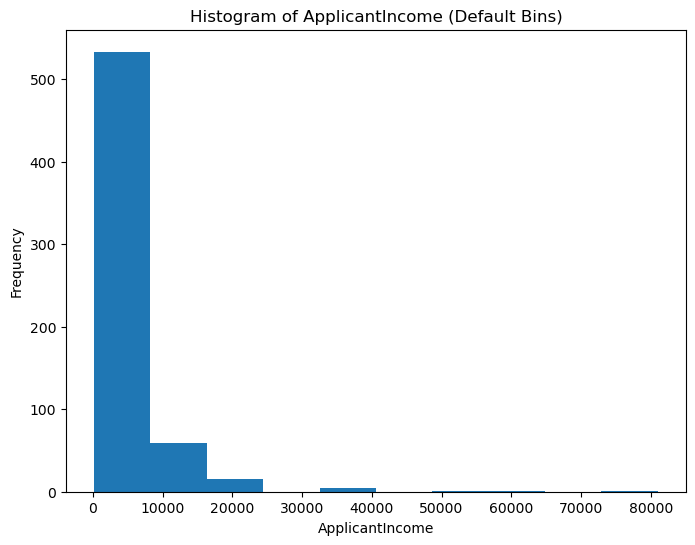

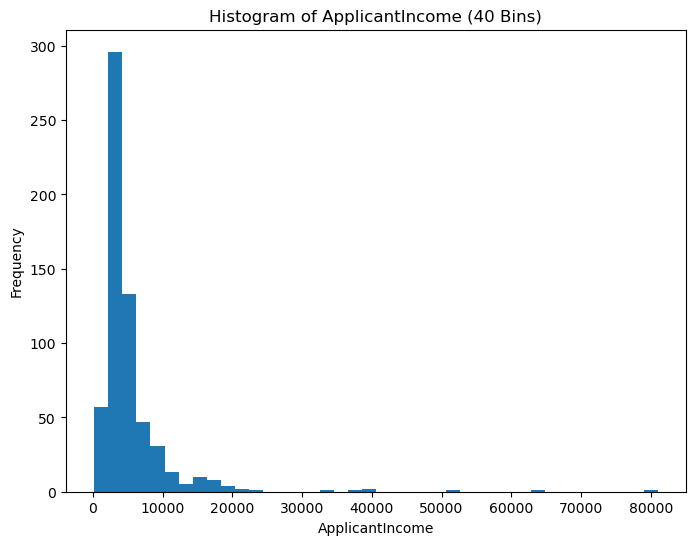

In [9]:
# Histogram with default number of bins
plt.figure(figsize=(8, 6))
plt.hist(df['ApplicantIncome'])
plt.title('Histogram of ApplicantIncome (Default Bins)')
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.show()

# Histogram number of bins = 40

plt.figure(figsize=(8, 6))
plt.hist(df['ApplicantIncome'], bins=40)
plt.title(f'Histogram of ApplicantIncome (40 Bins)')
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.show()


Look at box plots to understand the distributions. 

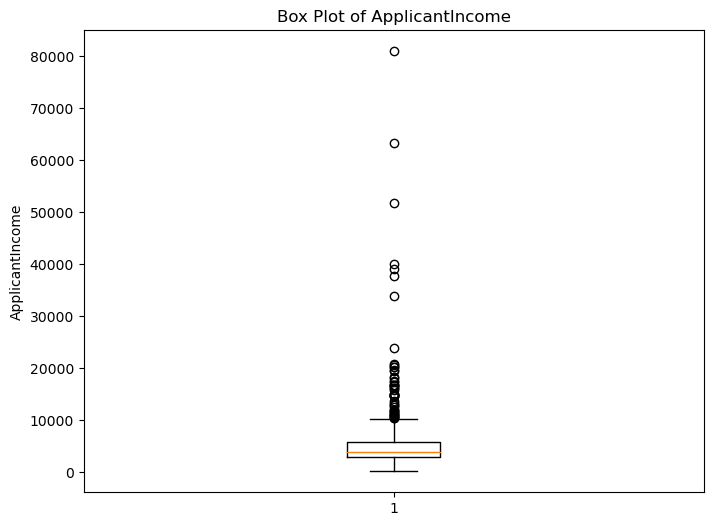

In [10]:
# Box plot of ApplicantIncome
plt.figure(figsize=(8, 6))
plt.boxplot(df['ApplicantIncome'])
plt.title('Box Plot of ApplicantIncome')
plt.ylabel('ApplicantIncome')
plt.show()

Look at the distribution of income segregated  by `Education`

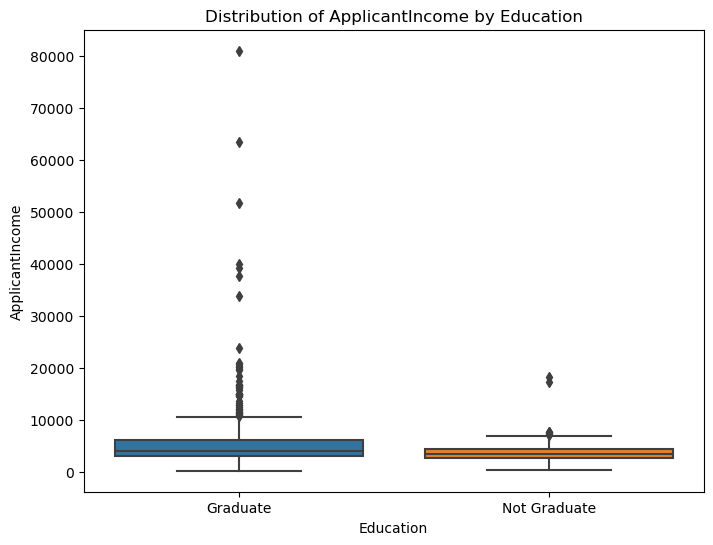

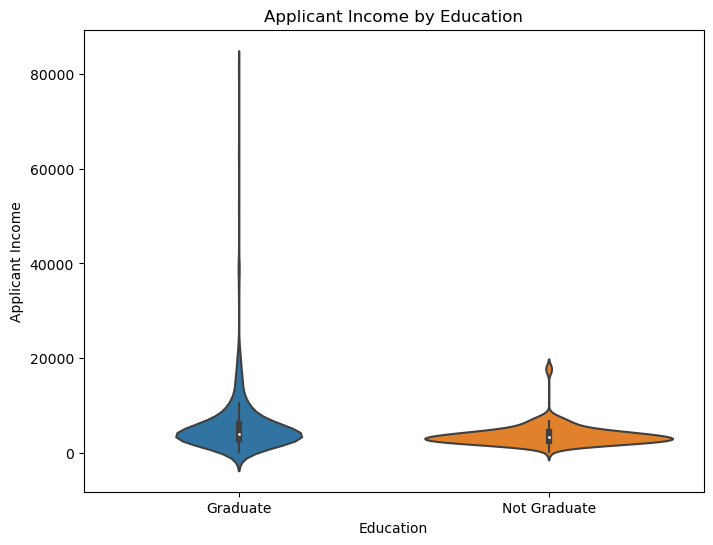

In [11]:
# Box plots  ApplicantIncome by Education
plt.figure(figsize=(8, 6))
sns.boxplot(x='Education', y='ApplicantIncome', data=df)
plt.title('Distribution of ApplicantIncome by Education')
plt.xlabel('Education')
plt.ylabel('ApplicantIncome')
plt.show()


# Violin Plot  Applicant Income by Education
plt.figure(figsize=(8, 6))
sns.violinplot(x='Education', y='ApplicantIncome', data=df)
plt.title('Applicant Income by Education')
plt.xlabel('Education')
plt.ylabel('Applicant Income')
plt.show()

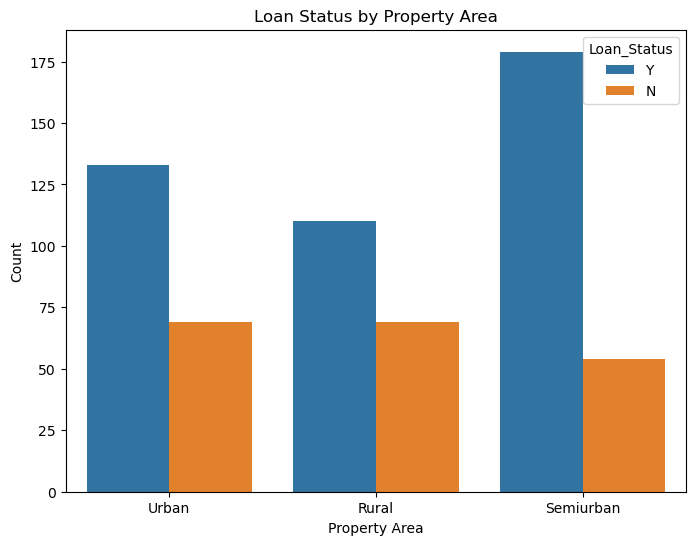

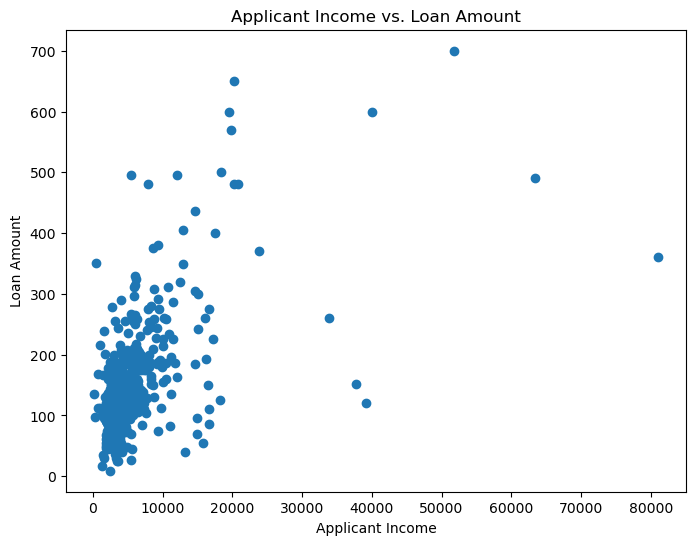

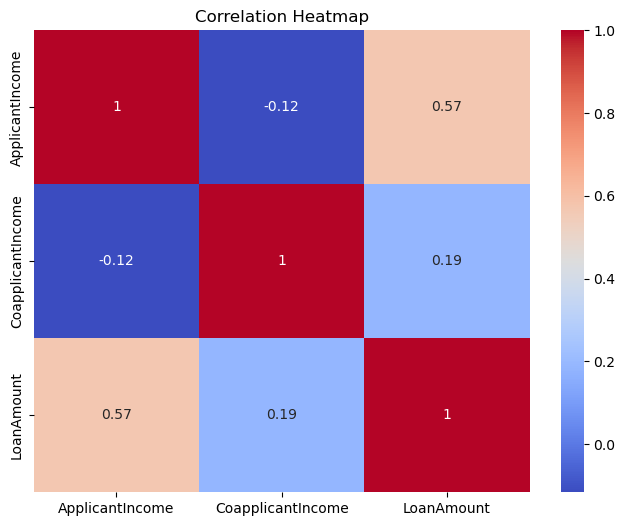

In [12]:

# Bar Plot: Loan Status by Property Area
plt.figure(figsize=(8, 6))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()

# Scatter Plot: Applicant Income vs. Loan Amount
plt.figure(figsize=(8, 6))
plt.scatter(df['ApplicantIncome'], df['LoanAmount'])
plt.title('Applicant Income vs. Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()



# Heatmap: Correlation between numerical variables
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
numeric_data = df[numeric_cols]
corr_matrix = numeric_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Look at the histogram and boxplot of LoanAmount

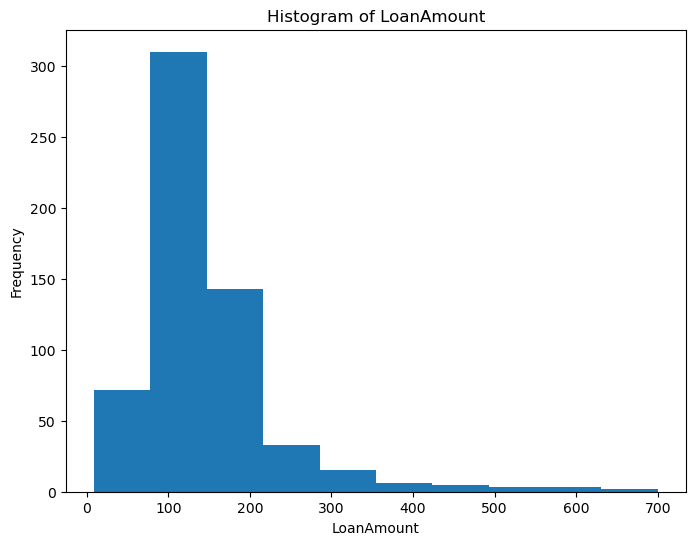

In [13]:
# Histogram of LoanAmount
plt.figure(figsize=(8, 6))
plt.hist(df['LoanAmount'], bins=10)
plt.title('Histogram of LoanAmount')
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')
plt.show()



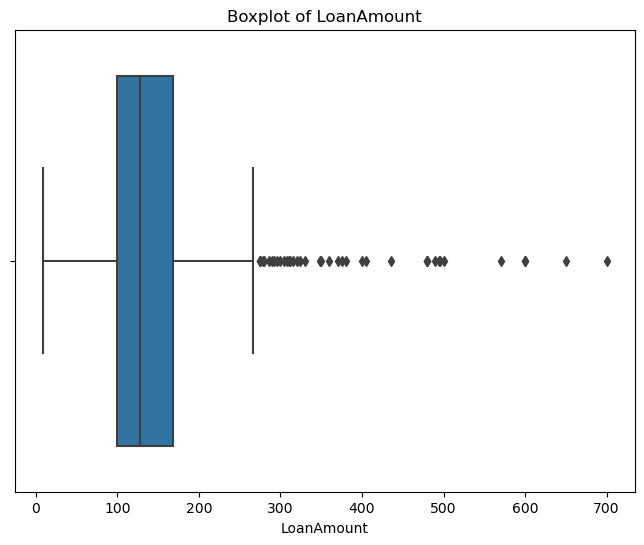

In [14]:
# Boxplot of LoanAmount
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['LoanAmount'])
plt.title('Boxplot of LoanAmount')
plt.xlabel('LoanAmount')
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [15]:
# Create a pivot table to analyze Loan_Status by Property_Area and Education
pivot_table = pd.pivot_table(df, values='Loan_Status', index='Property_Area', columns='Education', aggfunc='count')

# Display the pivot table
print("Pivot Table:")
print(pivot_table)

Pivot Table:
Education      Graduate  Not Graduate
Property_Area                        
Rural               131            48
Semiurban           187            46
Urban               162            40


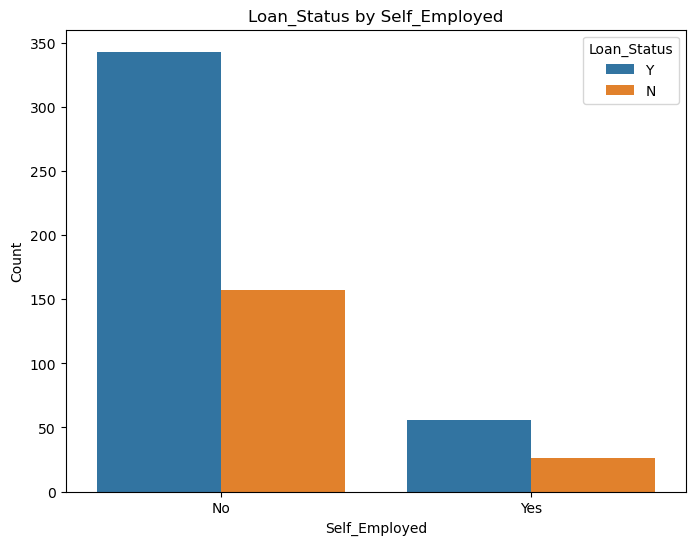

In [17]:

# Loan_Status by Self_Employed
plt.figure(figsize=(8, 6))
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)
plt.title('Loan_Status by Self_Employed')
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.show()

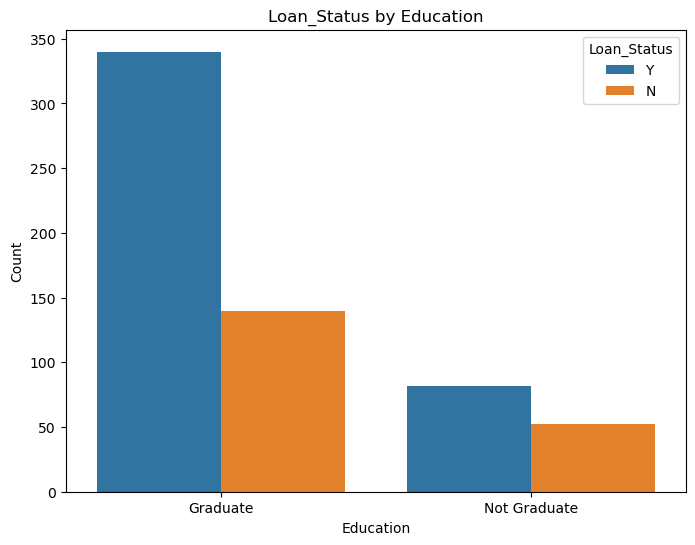

In [18]:
# Plot a grouped bar chart of 'Education' and 'Loan_Status'
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Loan_Status by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

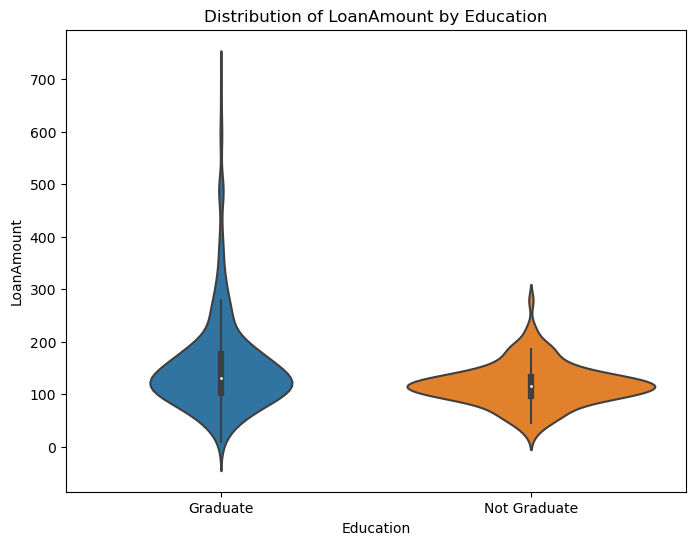

In [19]:
# Plot a violin plot of 'LoanAmount' across 'Education'
plt.figure(figsize=(8, 6))
sns.violinplot(x='Education', y='LoanAmount', data=df)
plt.title('Distribution of LoanAmount by Education')
plt.xlabel('Education')
plt.ylabel('LoanAmount')
plt.show()

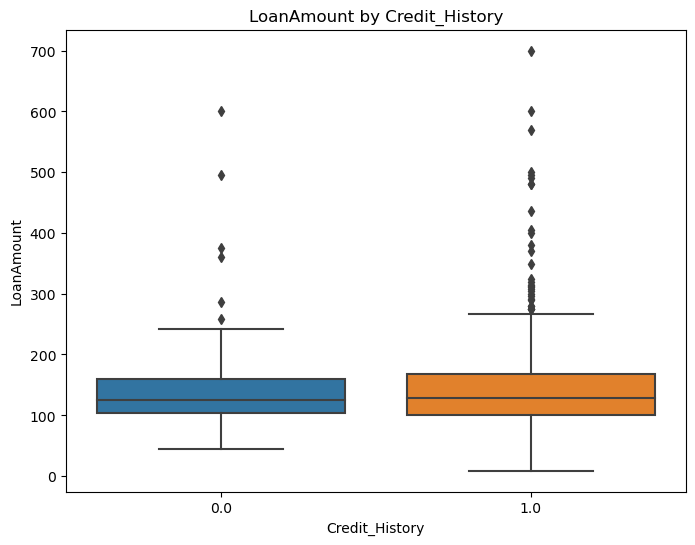

In [20]:
# Plot a grouped box plot of 'Credit_History' and 'LoanAmount'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Credit_History', y='LoanAmount', data=df)
plt.title('LoanAmount by Credit_History')
plt.xlabel('Credit_History')
plt.ylabel('LoanAmount')
plt.show()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


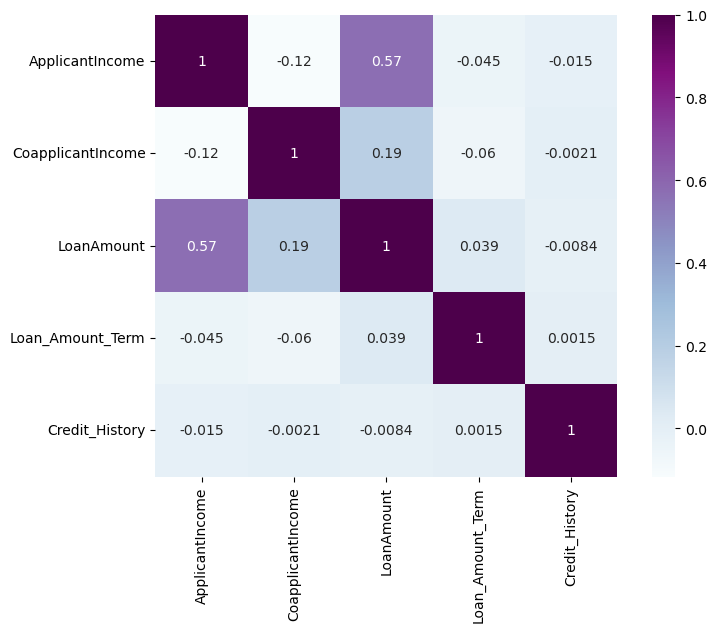

In [21]:
# calculate and visualize correlation matrix
matrix = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

matrix

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



In [22]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [23]:

# Fill missing values in 'Gender' with the mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Fill missing values in 'Married' with the mode
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

# Fill missing values in 'Dependents' with the mode
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

# Fill missing values in 'Self_Employed' with the mode
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

# Handling missing values in numerical columns

# Fill missing values in 'LoanAmount' with the median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Fill missing values in 'Loan_Amount_Term' with the mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

# Fill missing values in 'Credit_History' with the mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Print the updated missing value counts
print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


Loan Approval Rate:
Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64


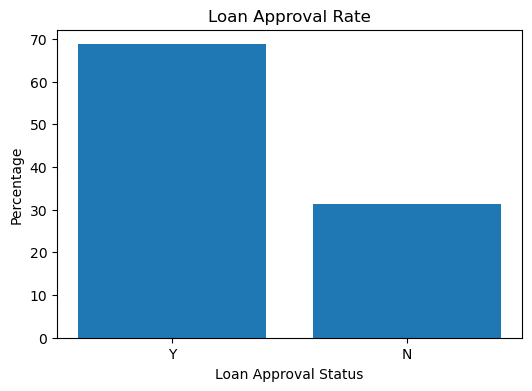

Loan Approval by Gender:
Gender  Loan_Status
Female  Y              66.964286
        N              33.035714
Male    Y              69.123506
        N              30.876494
Name: Loan_Status, dtype: float64


<Figure size 600x400 with 0 Axes>

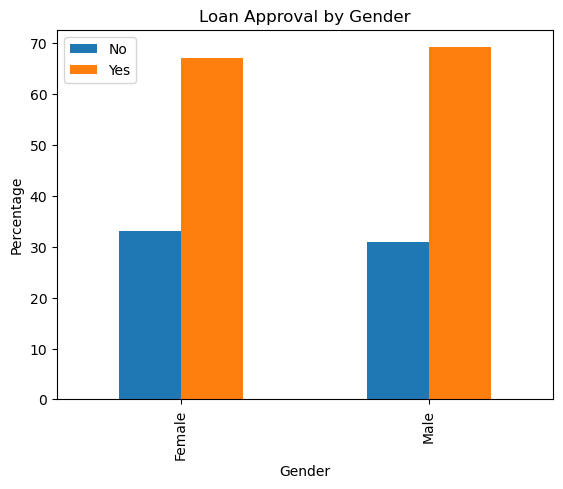

Loan Approval by Marital Status:
Married  Loan_Status
No       Y              62.910798
         N              37.089202
Yes      Y              71.820449
         N              28.179551
Name: Loan_Status, dtype: float64


<Figure size 600x400 with 0 Axes>

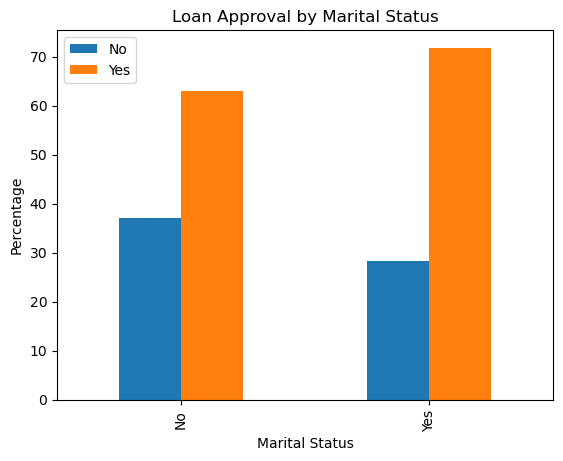

Loan Approval by Credit History:
Credit_History  Loan_Status
0.0             N              92.134831
                Y               7.865169
1.0             Y              79.047619
                N              20.952381
Name: Loan_Status, dtype: float64


<Figure size 600x400 with 0 Axes>

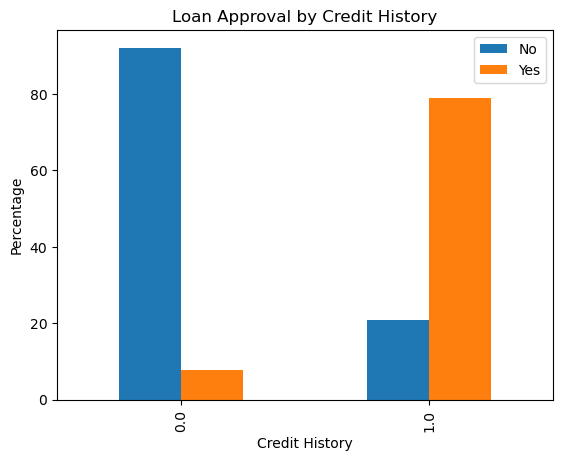

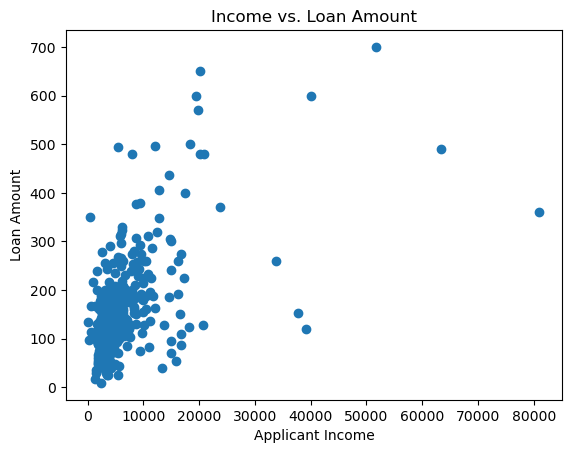

Loan Approval by Property Area:
Property_Area  Loan_Status
Rural          Y              61.452514
               N              38.547486
Semiurban      Y              76.824034
               N              23.175966
Urban          Y              65.841584
               N              34.158416
Name: Loan_Status, dtype: float64


<Figure size 600x400 with 0 Axes>

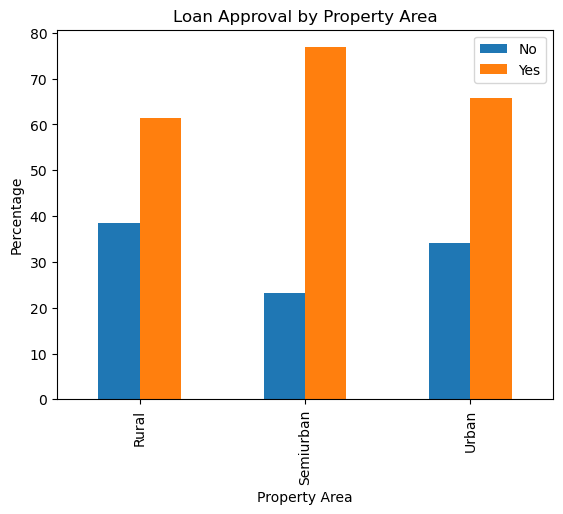

Loan Approval by Loan Term:
Loan Approval by Income:
ApplicantIncome    Loan_Status
(0.0, 2500.0]      Y              68.518519
                   N              31.481481
(2500.0, 5000.0]   Y              68.571429
                   N              31.428571
(5000.0, 7500.0]   Y              68.367347
                   N              31.632653
(7500.0, 10000.0]  Y              73.170732
                   N              26.829268
(10000.0, inf]     Y              67.307692
                   N              32.692308
Name: Loan_Status, dtype: float64


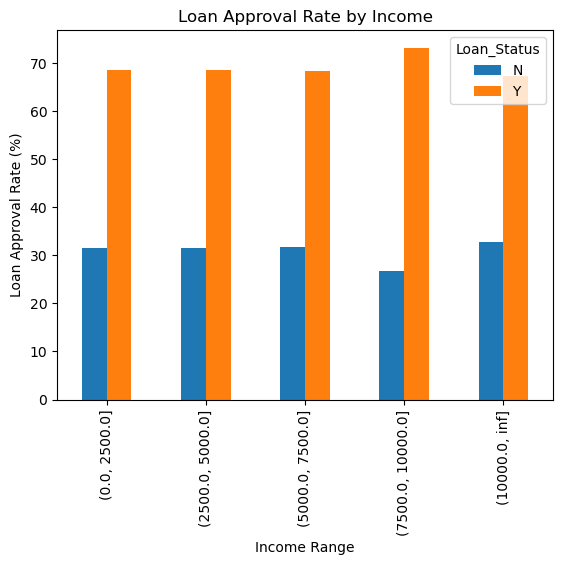

In [66]:
# 1. Loan Approval Rate
loan_approval_rate = df['Loan_Status'].value_counts(normalize=True) * 100
print("Loan Approval Rate:")
print(loan_approval_rate)

# Plot Loan Approval Rate
plt.figure(figsize=(6, 4))
plt.bar(loan_approval_rate.index, loan_approval_rate.values)
plt.xlabel('Loan Approval Status')
plt.ylabel('Percentage')
plt.title('Loan Approval Rate')
plt.show()

# 2. Loan Approval by Gender
loan_approval_gender = df.groupby('Gender')['Loan_Status'].value_counts(normalize=True) * 100
print("Loan Approval by Gender:")
print(loan_approval_gender)

# Plot Loan Approval by Gender
plt.figure(figsize=(6, 4))
loan_approval_gender.unstack().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Loan Approval by Gender')
plt.legend(['No', 'Yes'])
plt.show()

# 3. Loan Approval by Marital Status
loan_approval_marital = df.groupby('Married')['Loan_Status'].value_counts(normalize=True) * 100
print("Loan Approval by Marital Status:")
print(loan_approval_marital)

# Plot Loan Approval by Marital Status
plt.figure(figsize=(6, 4))
loan_approval_marital.unstack().plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.title('Loan Approval by Marital Status')
plt.legend(['No', 'Yes'])
plt.show()

# 4. Loan Approval by Credit History
loan_approval_credit_history = df.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True) * 100
print("Loan Approval by Credit History:")
print(loan_approval_credit_history)

# Plot Loan Approval by Credit History
plt.figure(figsize=(6, 4))
loan_approval_credit_history.unstack().plot(kind='bar')
plt.xlabel('Credit History')
plt.ylabel('Percentage')
plt.title('Loan Approval by Credit History')
plt.legend(['No', 'Yes'])
plt.show()

# 5. Income and Loan Amount
plt.scatter(df['ApplicantIncome'], df['LoanAmount'])
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Income vs. Loan Amount')
plt.show()

# 6. Loan Approval by Property Area
loan_approval_property_area = df.groupby('Property_Area')['Loan_Status'].value_counts(normalize=True) * 100
print("Loan Approval by Property Area:")
print(loan_approval_property_area)

# Plot Loan Approval by Property Area
plt.figure(figsize=(6, 4))
loan_approval_property_area.unstack().plot(kind='bar')
plt.xlabel('Property Area')
plt.ylabel('Percentage')
plt.title('Loan Approval by Property Area')
plt.legend(['No', 'Yes'])
plt.show()

# 7. Loan Approval by Loan Term
loan_approval_loan_term = df.groupby('Loan_Amount_Term')['Loan_Status'].value_counts(normalize=True) * 100
print("Loan Approval by Loan Term:")
print

# Loan Approval by Income
income_bins = pd.cut(df['ApplicantIncome'], bins=[0, 2500, 5000, 7500, 10000, np.inf])
loan_approval_income = df.groupby(income_bins)['Loan_Status'].value_counts(normalize=True) * 100
print("Loan Approval by Income:")
print(loan_approval_income)

# Convert the loan approval rates into a DataFrame for easier plotting
loan_approval_df = loan_approval_income.unstack()
loan_approval_df.plot(kind='bar')

# Set the plot labels and title
plt.xlabel('Income Range')
plt.ylabel('Loan Approval Rate (%)')
plt.title('Loan Approval Rate by Income')

# Show the plot
plt.show()

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

Text(0, 0.5, 'Frequency')

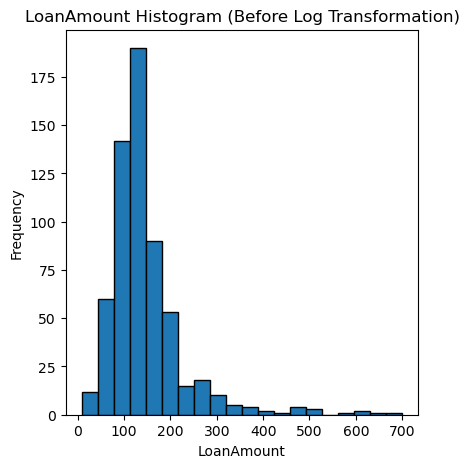

In [24]:
# Plot histogram before log transformation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['LoanAmount'], bins=20, edgecolor='black')
plt.title('LoanAmount Histogram (Before Log Transformation)')
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')



In [25]:
# Apply log transformation to LoanAmount
df['LoanAmount_log'] = np.log(df['LoanAmount'])



Text(0, 0.5, 'Frequency')

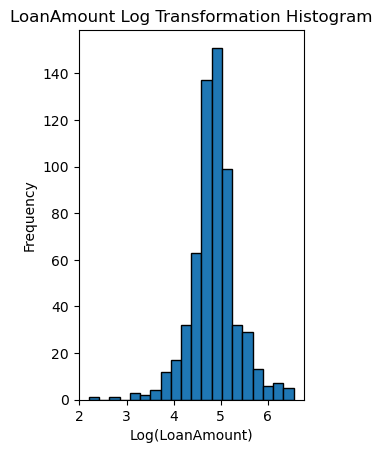

In [26]:
# Plot histogram after log transformation
plt.subplot(1, 2, 2)
plt.hist(df['LoanAmount_log'], bins=20, edgecolor='black')
plt.title('LoanAmount Log Transformation Histogram')
plt.xlabel('Log(LoanAmount)')
plt.ylabel('Frequency')

Combine both incomes as total income and take a log transformation of the same.

In [27]:
# Combine incomes into TotalIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']



In [28]:
# Apply log transformation to TotalIncome
df['TotalIncome_log'] = np.log(df['TotalIncome'])



In [29]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


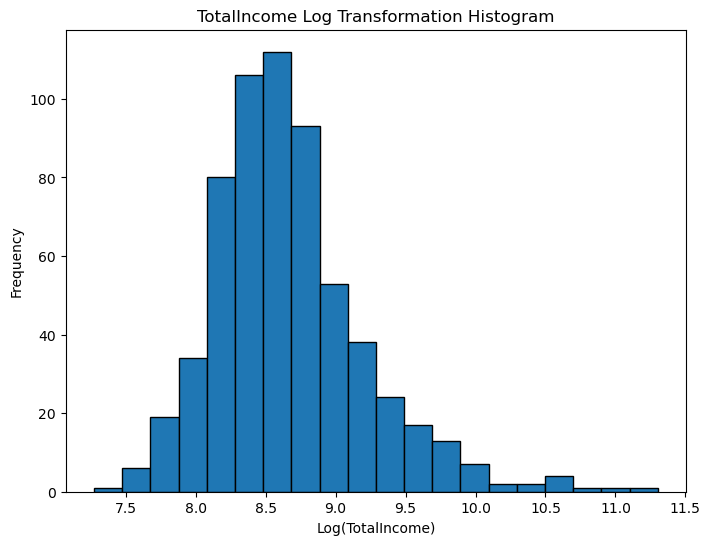

In [30]:
# Plot histogram of TotalIncome_log
plt.figure(figsize=(8, 6))
plt.hist(df['TotalIncome_log'], bins=20, edgecolor='black')
plt.title('TotalIncome Log Transformation Histogram')
plt.xlabel('Log(TotalIncome)')
plt.ylabel('Frequency')
plt.show()

## 4. Building a Predictive Model

In [31]:

X = df.drop(['Loan_ID','Loan_Status'], axis=1)
y = df['Loan_Status']


In [32]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic regression

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline


# Define the columns to be encoded and scaled
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
log_cols = ['TotalIncome_log']

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat_cols),
        ('num', StandardScaler(), num_cols),
        ('log', StandardScaler(), log_cols)
    ],
)

# Apply the transformations to the training set
X_train_transformed = preprocessor.fit_transform(X_train)

# Apply the same transformations to the testing set
X_test_transformed = preprocessor.transform(X_test)

In [34]:


# Apply the transformations to the training set
X_train_transformed = preprocessor.fit_transform(X_train)


# Apply the same transformations to the testing set
X_test_transformed = preprocessor.transform(X_test)


Confusion Matrix:
[[18 25]
 [ 2 78]]
Accuracy: 0.7804878048780488


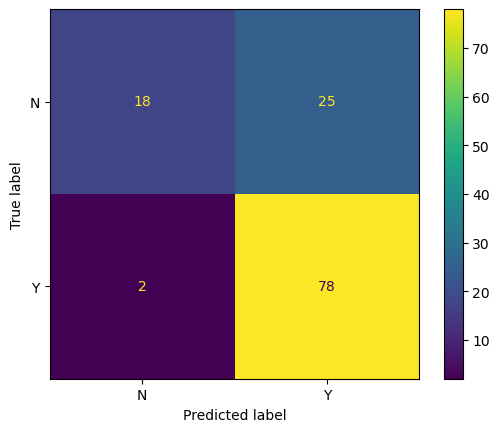

In [54]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

import matplotlib.pyplot as plt


# Create a logistic regression model
logistic_model = LogisticRegression()

# Fit the model on the transformed training data
logistic_model.fit(X_train_transformed, y_train)

# Predict on the transformed testing data
y_pred = logistic_model.predict(X_test_transformed)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logistic_model.classes_)
disp.plot()
plt.show()


In [36]:
# Save model
import pickle

# Assuming you have trained your model and stored it in a variable called 'model'

# Save the model to a file using pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(logistic_model, file)

In [37]:
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

Try paramater grid search to improve the results

Confusion Matrix:
[[18 25]
 [ 1 79]]
Accuracy: 0.7886178861788617


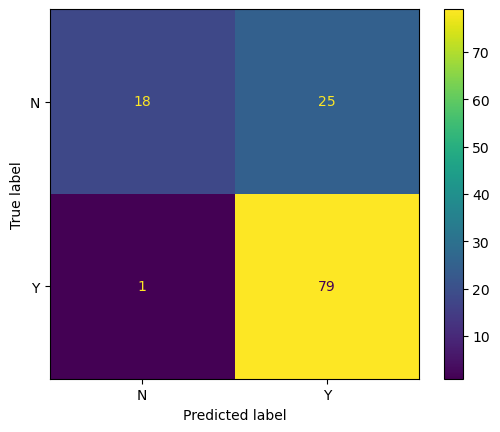

In [55]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'penalty': ['l2'],
    'solver': ['liblinear'],
    'C': [0.1, 1.0, 10.0]
}

# Create the logistic regression model
logistic_model_gs = LogisticRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(logistic_model_gs, param_grid, cv=5)

# Fit the GridSearchCV object on the transformed training data
grid_search.fit(X_train_transformed, y_train)

# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Predict on the transformed testing data using the best estimator
y_pred = best_estimator.predict(X_test_transformed)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search.classes_)
disp.plot()
plt.show()


## Randomforest & SVM and Gradient boost


In [47]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the models
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Train the models
random_forest.fit(X_train_transformed, y_train)
svm.fit(X_train_transformed, y_train)
gradient_boosting.fit(X_train_transformed, y_train)

# Make predictions on the test set
rf_predictions = random_forest.predict(X_test_transformed)
svm_predictions = svm.predict(X_test_transformed)
gb_predictions = gradient_boosting.predict(X_test_transformed)

# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
gb_accuracy = accuracy_score(y_test, gb_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_predictions))

Random Forest Accuracy: 0.7886178861788617
SVM Accuracy: 0.7967479674796748
Gradient Boosting Accuracy: 0.7642276422764228
Random Forest Classification Report:
              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

SVM Classification Report:
              precision    recall  f1-score   support

           N       1.00      0.42      0.59        43
           Y       0.76      1.00      0.86        80

    accuracy                           0.80       123
   macro avg       0.88      0.71      0.73       123
weighted avg       0.85      0.80      0.77       123

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           N       0.85      0.40      0.54        43
         

In [67]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the models
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the models
random_forest.fit(X_train_transformed, y_train)
svm.fit(X_train_transformed, y_train)
gradient_boosting.fit(X_train_transformed, y_train)
decision_tree.fit(X_train_transformed, y_train)

# Make predictions on the test set
rf_predictions = random_forest.predict(X_test_transformed)
svm_predictions = svm.predict(X_test_transformed)
gb_predictions = gradient_boosting.predict(X_test_transformed)
dt_predictions = decision_tree.predict(X_test_transformed)

# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
gb_accuracy = accuracy_score(y_test, gb_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_predictions))

print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))

Random Forest Accuracy: 0.7804878048780488
SVM Accuracy: 0.7886178861788617
Gradient Boosting Accuracy: 0.7642276422764228
Decision Tree Accuracy: 0.7154471544715447
Random Forest Classification Report:
              precision    recall  f1-score   support

           N       0.90      0.42      0.57        43
           Y       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

SVM Classification Report:
              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           N       0

### Hyperparameters Tuning

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(random_forest, param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Get the best model
best_random_forest = grid_search.best_estimator_

# Make predictions on the test set using the best model
rf_predictions = best_random_forest.predict(X_test_transformed)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Best Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Accuracy: 0.7886178861788617
Random Forest Classification Report:
              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

## Pipeline

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer

# Define the columns to be encoded and scaled
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Define a custom function to add 'TotalIncome' column and take the log of 'TotalIncome'
def add_log_total_income(X):
    X_copy = X.copy()
    X_copy['TotalIncome'] = X_copy['ApplicantIncome'] + X_copy['CoapplicantIncome']
    X_copy['TotalIncome_log'] = np.log(X_copy['TotalIncome'])
    return X_copy

# Create the ColumnTransformer
l_preprocessor = ColumnTransformer(
    transformers=[
        ('add_log_total_income', FunctionTransformer(add_log_total_income), num_cols),
        ('cat', OneHotEncoder(), cat_cols),
        ('num', StandardScaler(), num_cols + ['TotalIncome_log'])
    ],

)

In [33]:
# Define the classifier
l_classifier = LogisticRegression()

In [34]:
# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', l_preprocessor),
    ('classifier', l_classifier)
])

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('add_log_total_income',
                                                  FunctionTransformer(func=<function add_log_total_income at 0x00000233082CAF70>),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area']),
                                                 ('

In [36]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix:
[[18 25]
 [ 1 79]]
Accuracy: 0.7886178861788617


In [38]:
# Save model
import pickle

# Assuming you have trained your model and stored it in a variable called 'model'

# Save the model to a file using pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(l_classifier, file)

In [42]:
# Testing for prediction
# Create a new DataFrame with the required columns
x_new = pd.DataFrame({
    'Gender': ['Male'],
    'Married': ['Yes'],
    'Dependents': ['0'],
    'Education': ['Graduate'],
    'Self_Employed': ['No'],
    'Property_Area': ['Urban'],
    'ApplicantIncome': [5000],
    'CoapplicantIncome': [2000],
    'LoanAmount': [150],
    'Loan_Amount_Term': [360],
    'Credit_History': [1]
})

# Add the 'TotalIncome' column and take the log of 'TotalIncome'
x_new['TotalIncome'] = x_new['ApplicantIncome'] + x_new['CoapplicantIncome']
x_new['TotalIncome_log'] = np.log(x_new['TotalIncome'])

# Make predictions on the new data
y_pred = pipeline.predict_proba(x_new)
print(y_pred)

threshold = 0.5
binary_prediction = ['Yes' if prob >= threshold else 'No' for prob in y_pred[:, 1]]
print(binary_prediction)

[[0.17939456 0.82060544]]
['Yes']


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

## Flask Deployment

In [33]:
import requests

# Define the input data for prediction
input_data = {
    "Gender": "Male",
    "Married": "Yes",
    "Dependents": "2",
    "Education": "Graduate",
    "Self_Employed": "No",
    "ApplicantIncome": 3000,
    "CoapplicantIncome": 1000,
    "LoanAmount": 120,
    "Loan_Amount_Term": 360,
    "Credit_History": 1,
    "Property_Area": "Urban"
}

# Send a POST request to the /predict endpoint
response = requests.post('http://127.0.0.1:5000/predict', json=input_data)

# Print the response
print(response.json())

{'Loan_Status': 'Approved', 'Probability': 0.853872094556945}


## AWS Deployment

 ### AWS URL = http://ec2-3-140-189-35.us-east-2.compute.amazonaws.com:5555/predict

In [35]:
import requests

# Define the input data for prediction
input_data = {
    "Gender": "Male",
    "Married": "Yes",
    "Dependents": "2",
    "Education": "Graduate",
    "Self_Employed": "No",
    "ApplicantIncome": 2000,
    "CoapplicantIncome": 1000,
    "LoanAmount": 120,
    "Loan_Amount_Term": 360,
    "Credit_History": 0,
    "Property_Area": "Urban"
}

# Send a POST request to the /predict endpoint
response = requests.post('http://ec2-3-140-189-35.us-east-2.compute.amazonaws.com:5555/predict', json=input_data)

# Print the response
print(response.json())

{'Loan_Status': 'Rejected', 'Probability': 0.09061084902347383}
